In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import probplot

%matplotlib inline

In [2]:
df = pd.read_excel('autoMPG_data.xlsx')

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GallonsPer100Miles        392 non-null    float64
 1   GallonsPer100MilesTo1981  362 non-null    float64
 2   MPG                       392 non-null    float64
 3   Cylinders                 392 non-null    int64  
 4   Displacement100ci         392 non-null    float64
 5   Horsepower100             392 non-null    float64
 6   Weight1000lb              392 non-null    float64
 7   Seconds0to60              392 non-null    float64
 8   Year                      392 non-null    int64  
 9   Year70To81                392 non-null    int64  
 10  Origin                    392 non-null    int64  
 11  Origin.Eq.1               392 non-null    int64  
 12  Origin.Eq.2               392 non-null    int64  
 13  Origin.Eq.3               392 non-null    int64  
 14  Name      

# Puuttuvien arvojen tarkastus ja korvaaminen

In [4]:
print(df.isnull().sum())

GallonsPer100Miles           0
GallonsPer100MilesTo1981    30
MPG                          0
Cylinders                    0
Displacement100ci            0
Horsepower100                0
Weight1000lb                 0
Seconds0to60                 0
Year                         0
Year70To81                   0
Origin                       0
Origin.Eq.1                  0
Origin.Eq.2                  0
Origin.Eq.3                  0
Name                         0
dtype: int64


In [7]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [9]:
print(df.isnull().sum())

GallonsPer100Miles          0
GallonsPer100MilesTo1981    0
MPG                         0
Cylinders                   0
Displacement100ci           0
Horsepower100               0
Weight1000lb                0
Seconds0to60                0
Year                        0
Year70To81                  0
Origin                      0
Origin.Eq.1                 0
Origin.Eq.2                 0
Origin.Eq.3                 0
Name                        0
dtype: int64


# Jakaumat eri muuttujille

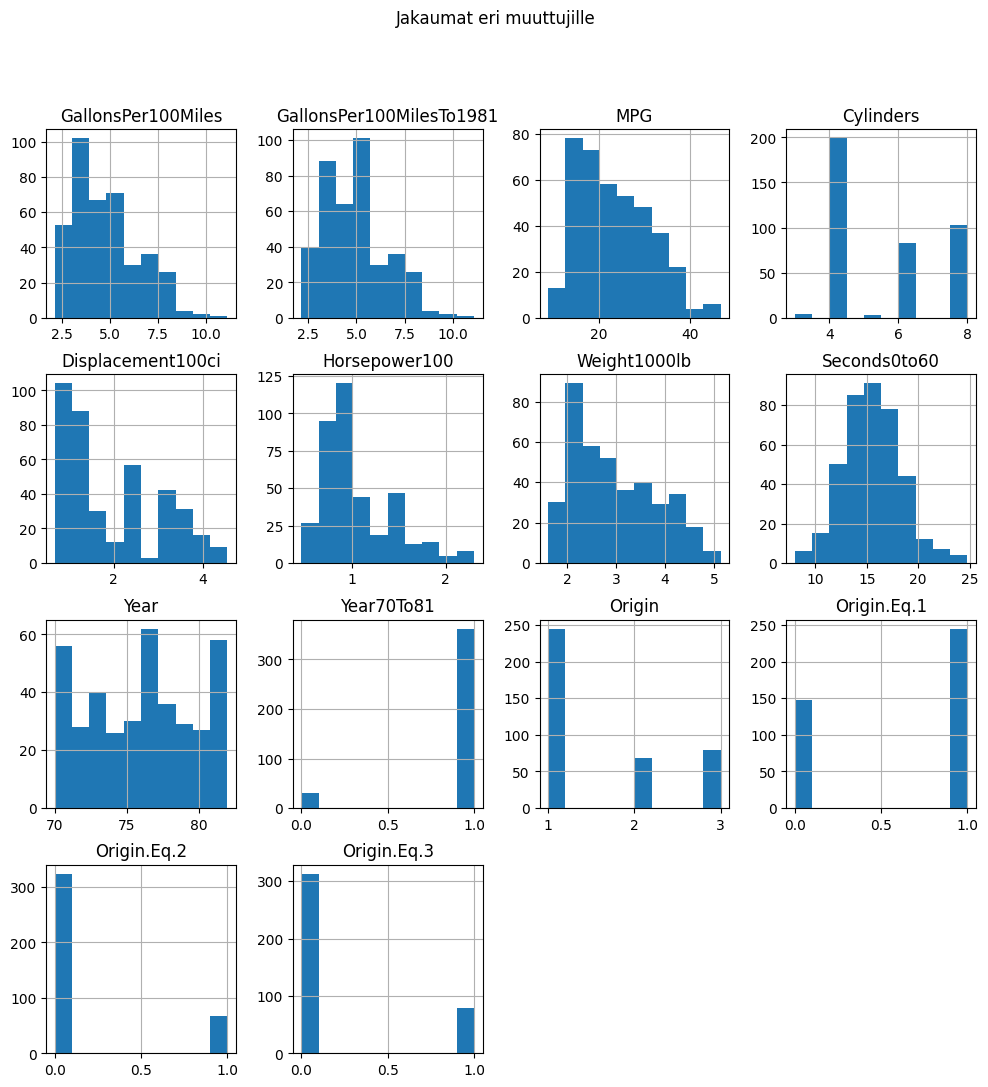

In [10]:
df.hist(figsize=(12, 12))
plt.suptitle("Jakaumat eri muuttujille")
plt.show()

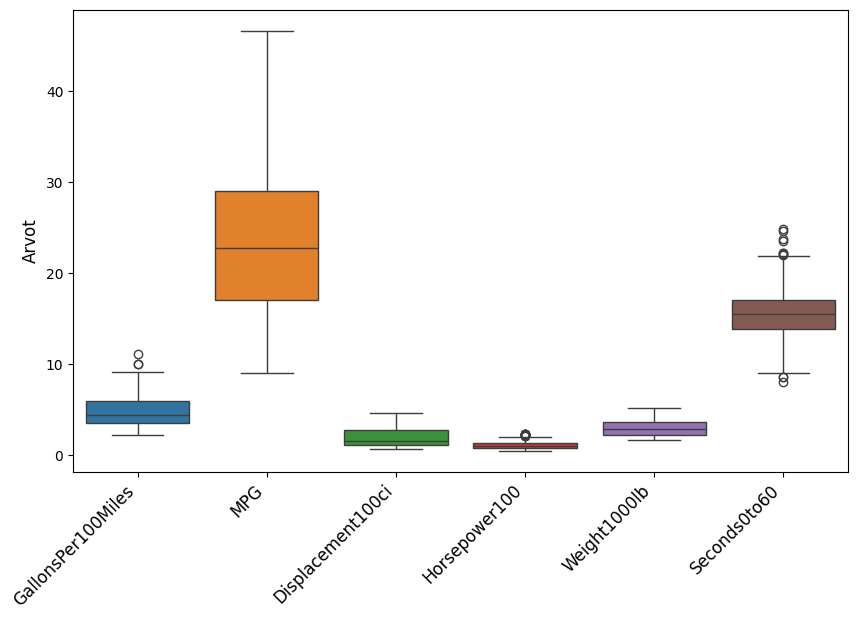

In [51]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df[['GallonsPer100Miles', 'MPG', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']])

plt.xticks(rotation=45, ha='right', fontsize=12)


plt.ylabel('Arvot', fontsize=12)

plt.show()



# Korrelaatiot ja hajontakaaviot

In [13]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

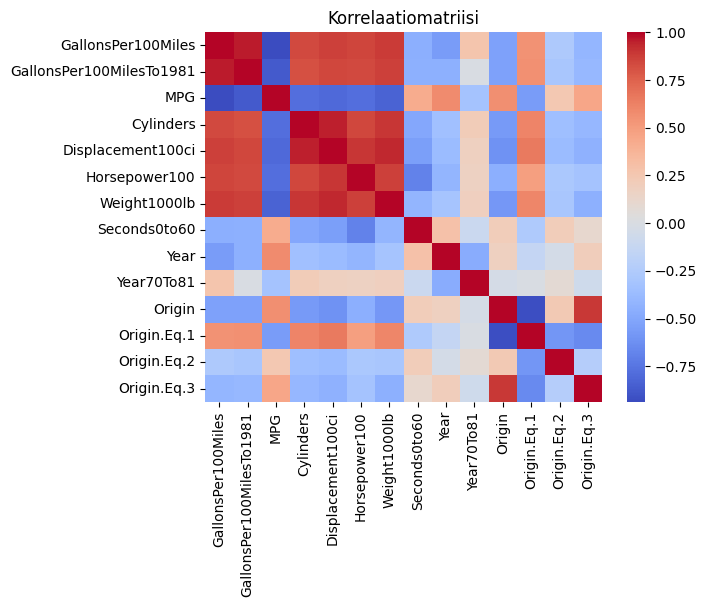

In [41]:
sns.heatmap(corr, cmap='coolwarm', fmt=".2f")
plt.title("Korrelaatiomatriisi")
plt.show()

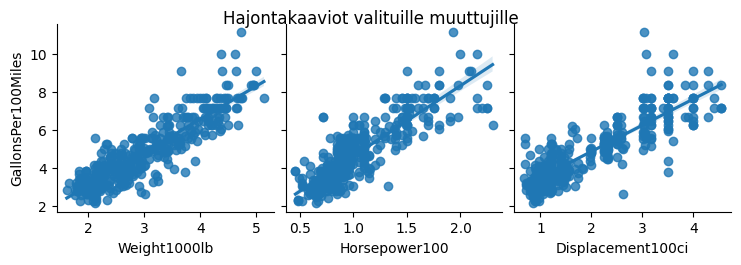

In [42]:
sns.pairplot(df, x_vars=['Weight1000lb', 'Horsepower100', 'Displacement100ci'], y_vars='GallonsPer100Miles', kind='reg')
plt.suptitle("Hajontakaaviot valituille muuttujille", y=1.02)
plt.show()

# Mallin rakentaminen ja testaus

In [ ]:
X = df[['Weight1000lb', 'Horsepower100', 'Displacement100ci']]  # Riippumattomat muuttujat
y = df['GallonsPer100Miles']  # Riippuva muuttuja

In [ ]:
# Data jaetaan koulutus- ja testijoukkoihin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Mallin luominen ja koulutus
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Ennusteet testidatalla
y_pred = model.predict(X_test)

In [22]:
# Mallin suorituskyvyn arviointi
print(f"R²: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

R²: 0.8374899628496058
MSE: 0.4165039558786529
MAE: 0.5136699426557357


# Virheanalyysi ja lineaarisen mallin oletusten tarkistaminen

In [ ]:
residuals = y_test - y_pred

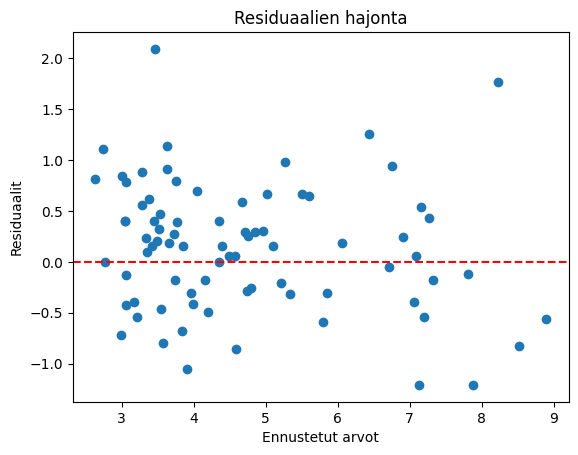

In [44]:
# Residuaalien hajontakaavio
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Ennustetut arvot')
plt.ylabel('Residuaalit')
plt.title('Residuaalien hajonta')
plt.show()

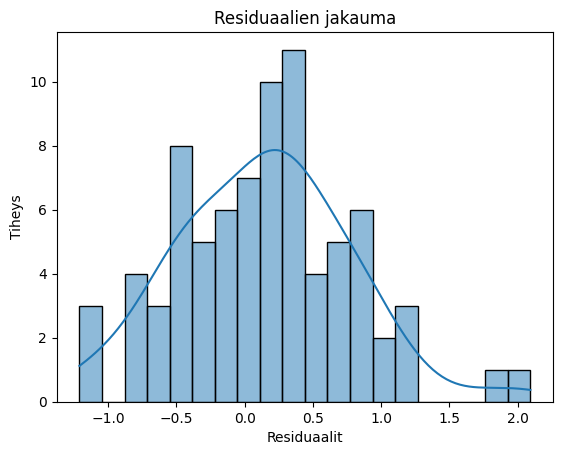

In [25]:
# Residuaalien jakauma
sns.histplot(residuals, kde=True, bins=20)
plt.title("Residuaalien jakauma")
plt.xlabel("Residuaalit")
plt.ylabel("Tiheys")
plt.show()

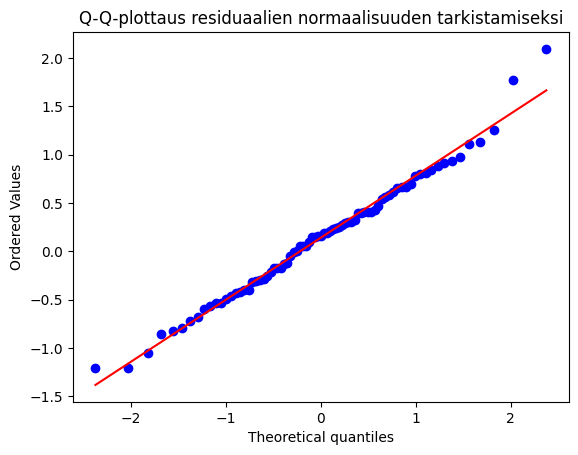

In [45]:
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q-plottaus residuaalien normaalisuuden tarkistamiseksi")
plt.show()

# Mallin käyttäminen interpolaatioon ja ekstrapolaatioon

In [ ]:
# Luodaan uusia arvoja interpolointiin ja ekstrapolointiin
new_values_interpolation = pd.DataFrame([[3.0, 2.0, 2.5]], columns=['Weight1000lb', 'Horsepower100', 'Displacement100ci'])
new_values_extrapolation = pd.DataFrame([[5.0, 4.0, 5.0]], columns=['Weight1000lb', 'Horsepower100', 'Displacement100ci'])

In [29]:
# Ennusteet
interp_prediction = model.predict(new_values_interpolation)
extrap_prediction = model.predict(new_values_extrapolation)

In [31]:
print(f"Interpolaatioennuste: {interp_prediction[0]}")
print(f"Ekstrapolaatioennuste: {extrap_prediction[0]}")

Interpolaatioennuste: 6.2246059449260756
Ekstrapolaatioennuste: 11.480529923047204


# Lopuksi mallin vertailu eri muuttujayhdistelmillä löytääksemme parhaimman mallin

In [32]:
# Mallien määrittely eri muuttujayhdistelmille
X1 = df[['Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 'Seconds0to60']]
X2 = df[['Displacement100ci', 'Horsepower100', 'Weight1000lb']]
X3 = df[['Cylinders', 'Displacement100ci', 'Seconds0to60']]

In [34]:
fuel_model1 = LinearRegression().fit(X1, y)
fuel_model2 = LinearRegression().fit(X2, y)
fuel_model3 = LinearRegression().fit(X3, y)

In [36]:
# Suorituskyvyn vertailu
print(f"Model 1 R²: {fuel_model1.score(X1, y)}")
print(f"Model 2 R²: {fuel_model2.score(X2, y)}")
print(f"Model 3 R²: {fuel_model3.score(X3, y)}")

Model 1 R²: 0.8207948199718269
Model 2 R²: 0.8158213878482583
Model 3 R²: 0.7529103569205208


In [39]:
# Parhaan mallin valinta
best_model = max([(fuel_model1, fuel_model1.score(X1, y)),
                (fuel_model2, fuel_model2.score(X2, y)),
                (fuel_model3, fuel_model3.score(X3, y))],
                key=lambda x: x[1])[0]
print(f"Paras malli: {best_model}")

Paras malli: LinearRegression()
